In [58]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
data= pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Codes/kaggle/Titanic/train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory data analysis and Visualization

In [5]:
data.shape

(891, 12)

Let's visualize data and gain a better insight about who survived and who died!

([<matplotlib.patches.Wedge at 0x1fe27b46630>,
 [Text(-1.12098,-0.428264,'Died'), Text(1.02756,0.392575,'Survived')],
 [Text(-0.653903,-0.24982,'61.6%'), Text(0.560489,0.214132,'38.4%')])

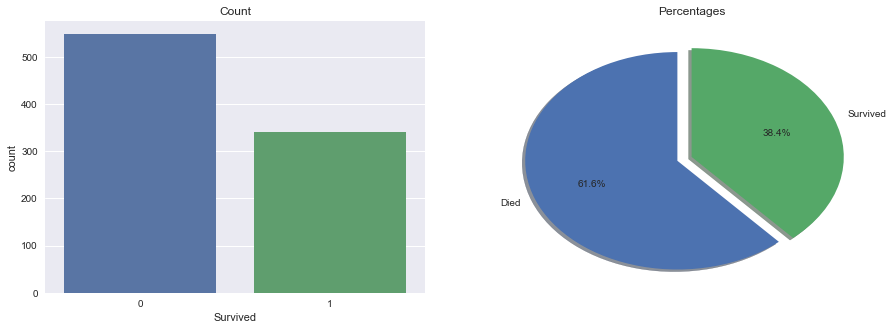

In [6]:
fig, ax = plt.subplots(1,2, figsize=[15,5])
ax[0].set_title("Count")
sns.countplot(data['Survived'], ax=ax[0])
ax[1].set_title("Percentages")
plt.pie(data['Survived'].value_counts(),labels=['Died','Survived'],explode=(0.1,0),
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

Above plot shows that more than 61% people failed to survive in that tragic incident.

Let's get a deep insight about people who survived and who couldn't.

<Figure size 504x360 with 0 Axes>

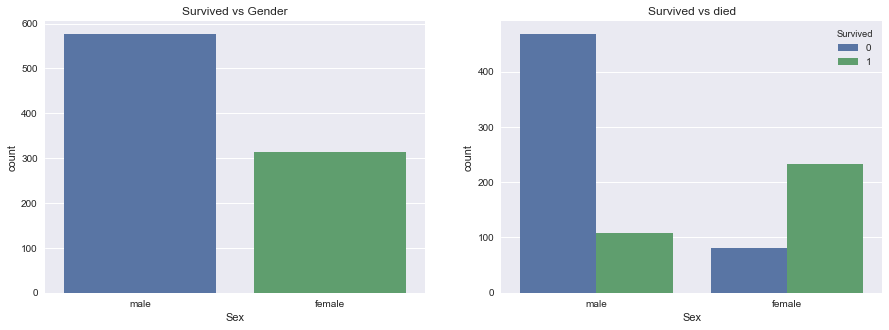

In [7]:
plt.figure(figsize=[7,5])
fig, ax = plt.subplots(1,2, figsize=[15,5])
ax[0].set_title('Survived vs Gender')
sns.countplot(data['Sex'], ax=ax[0])
ax[1].set_title("Survived vs died")
sns.countplot(data['Sex'], hue=data['Survived'], ax=ax[1])

Above plot shows that there were more men than women in that ship and majority of them failed to save their lives.

<Figure size 504x360 with 0 Axes>

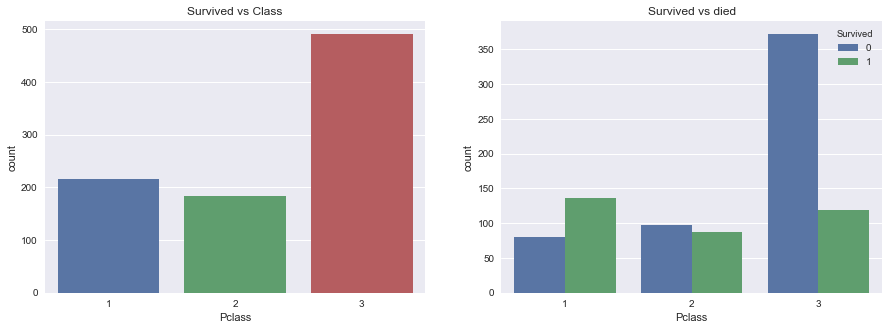

In [7]:
plt.figure(figsize=[7,5])
fig, ax = plt.subplots(1,2, figsize=[15,5])
ax[0].set_title('Survived vs Class')
sns.countplot(data['Pclass'], ax=ax[0])
ax[1].set_title("Survived vs died")
sns.countplot(data['Pclass'], hue=data['Survived'], ax=ax[1])

Above plot shows that there were lower class people in abundant and majority of them died while the ratio of survived and died people of higher and middle class is almost same.

<Figure size 504x360 with 0 Axes>

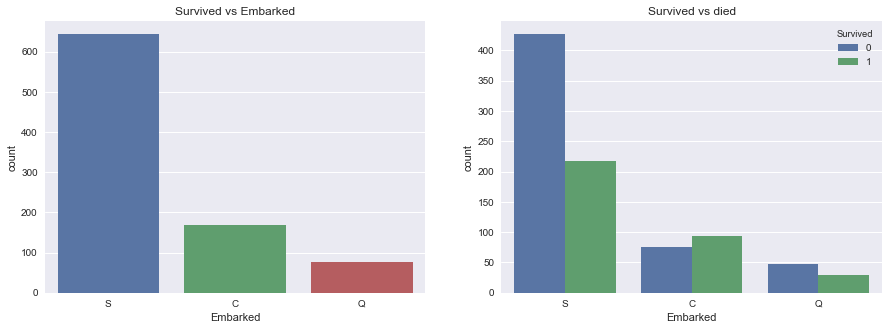

In [10]:
plt.figure(figsize=[7,5])
fig, ax = plt.subplots(1,2, figsize=[15,5])
ax[0].set_title('Survived vs Embarked')
sns.countplot(data['Embarked'], ax=ax[0])
ax[1].set_title("Survived vs died")
sns.countplot(data['Embarked'], hue=data['Survived'], ax=ax[1])

Above plot shows that pople of category S were in abundant and half of them died.

<Figure size 504x360 with 0 Axes>

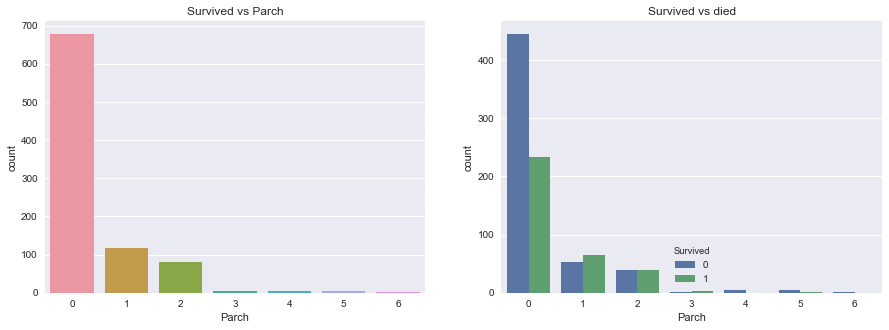

In [8]:
plt.figure(figsize=[7,5])
fig, ax = plt.subplots(1,2, figsize=[15,5])
ax[0].set_title('Survived vs Parch')
sns.countplot(data['Parch'], ax=ax[0])
ax[1].set_title("Survived vs died")
sns.countplot(data['Parch'], hue=data['Survived'], ax=ax[1])

<Figure size 504x360 with 0 Axes>

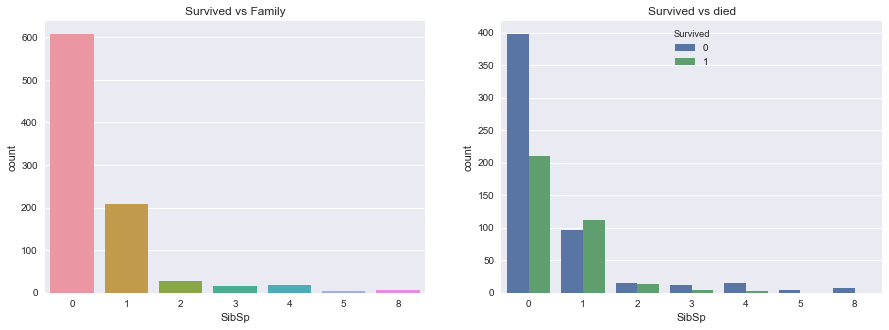

In [9]:
plt.figure(figsize=[7,5])
fig, ax = plt.subplots(1,2, figsize=[15,5])
ax[0].set_title('Survived vs Family')
sns.countplot(data['SibSp'], ax=ax[0])
ax[1].set_title("Survived vs died")
sns.countplot(data['SibSp'], hue=data['Survived'], ax=ax[1])

Above plots show that there were more people in the ship who were alone and half of them died.

### Feature Engineering and Data Cleaning

Let's see if there exist any missing value in our data and do some feature engineering!

In [8]:
data.isnull().sum().sort_values(ascending=False)

total= data.isnull().sum().sort_values(ascending=False)
percent= ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

missing= pd.concat([total, percent], axis=1,join='outer', keys=['Total','Percentage'])
missing

,Total,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


As we can see that more than 77% values are missing in Cabin feature, 19% in Age and only 2 values are missed in Embarked. 

Let's view the type of features.

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Let's transform these object type features into numeric type.

Map 'Sex' values.

In [9]:
print("Before: ", data['Sex'].unique())

data['Sex']= data['Sex'].replace({'female':0, 'male':1}).astype('int')

print("After: ", data['Sex'].unique())

Before:  ['male' 'female']
After:  [1 0]


Map 'Age' values in range.

In [10]:
data['Age'].fillna(29, inplace=True)

data.loc[data['Age']<=16, 'Age' ]=0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age']=1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age']=2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age']=3
data.loc[data['Age']>64, 'Age' ]=4

Map 'Fare' values in range.

In [11]:
data.loc[data['Fare']<=5, 'Fare' ]=0
data.loc[(data['Fare']>5) & (data['Fare']<=20), 'Fare']=1
data.loc[(data['Fare']>20) & (data['Fare']<=50), 'Fare']=2
data.loc[(data['Fare']>50) & (data['Fare']<=100), 'Fare']=3
data.loc[data['Fare']>100, 'Fare' ]=4
data['Fare']=data['Fare'].astype(int)

print("After: ",data['Fare'].unique())

After:  [1 3 2 4 0]


Map 'Embarked' values.

In [12]:
data['Embarked'].fillna('S', inplace=True)

print("Before: ", data['Embarked'].unique())

data['Embarked']= data['Embarked'].replace({'S':0, 'C':1, 'Q':2}).astype('int')

print("After: ", data['Embarked'].unique())

Before:  ['S' 'C' 'Q']
After:  [0 1 2]


Map 'Cabin' feature into 0 and 1 i.e 1=Cabin , 0= No cabin

In [13]:
data['Cabin']= data['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

Let's analyze 'Parch' and 'Sibsp' features and concate them into a single feature 'Family'.

In [14]:
data['Family']=0
data['Family']= data['Parch']+data['SibSp']

Let's drop categorical features.

In [15]:
data.drop(['PassengerId', 'Name', 'Ticket','Parch','SibSp'], axis=1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
Fare        891 non-null int32
Cabin       891 non-null int64
Embarked    891 non-null int32
Family      891 non-null int64
dtypes: float64(1), int32(3), int64(4)
memory usage: 45.3 KB


In [17]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,1,1.0,1,0,0,1
1,1,1,0,2.0,3,1,1,1
2,1,3,0,1.0,1,0,0,0
3,1,1,0,2.0,3,1,0,1
4,0,3,1,2.0,1,0,0,0


So we have cleaned our data, extracted useful features and dropped unecessary columns.

Now all of our features are of numeric type and all ready to feed into our Machine Learning Classifiers!

### Model development

In [18]:
y=np.asarray(data['Survived'])
data.drop('Survived', axis=1, inplace=True)
x=np.asarray(data)

In [19]:
x.shape

(891, 7)

Let's split data into two , train and test set.

In [20]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.3, random_state=4)

##### Logostic Regression

Logistic Regression algorithm, is to find the best parameters θ, in such a way that the model best predicts the class of each case.

Let's build classifier using Logistic Regression and fit data into it.

In [14]:
LR= LogisticRegression(C=1)
LR.fit(xtrain, ytrain)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Let's evaluate model's accuracy by predicting In-sample and Out-sample data.

In [15]:
predict= LR.predict(xtrain)
print("In-Sample accuracy:",f1_score(ytrain, predict))
print(confusion_matrix(ytrain, predict, labels=[1,0]))

predict= LR.predict(xtest)
print("\nOut-Sample accuracy: ",f1_score(ytest, predict))
print(confusion_matrix(ytest, predict, labels=[1,0]))

In-Sample accuracy: 0.7222222222222222
[[182  70]
 [ 70 301]]

Out-Sample accuracy:  0.7262569832402235
[[ 65  25]
 [ 24 154]]


This shows that our model is just right as accuracy on In-sample data and Out-sample data is almost same i.e no high bias/variance problem.

Let's try building model using high order polynomials to see if we can achieve some high accuracy.

In [65]:
#using 4th degree polynomials

Poly= PolynomialFeatures(4)
xpoly=Poly.fit_transform(x)

xtrain, xtest, ytrain, ytest= train_test_split(xpoly, y, test_size=0.3, random_state=4)

xtrain.shape, ytrain.shape

((623, 330), (623,))

In [17]:
LRp= LogisticRegression(C=1)
LRp.fit(xtrain, ytrain)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
predict= LRp.predict(xtrain)
print("In-Sample accuracy:",f1_score(ytrain, predict))
print(confusion_matrix(ytrain, predict, labels=[1,0]))

predict= LRp.predict(xtest)
print("\nOut-Sample accuracy: ",f1_score(ytest, predict))
print(confusion_matrix(ytest, predict, labels=[1,0]))

In-Sample accuracy: 0.8232758620689655
[[191  61]
 [ 21 350]]

Out-Sample accuracy:  0.7261904761904762
[[ 61  29]
 [ 17 161]]


Seems like our model is suffering from high variance problem.

Let's decrease this variance factor by reducing the value of C which is controlling our model's regularization.

In [19]:
LRp= LogisticRegression(C=0.01)
LRp.fit(xtrain, ytrain)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
predict= LRp.predict(xtrain)
print("In-Sample accuracy:",f1_score(ytrain, predict))
print(confusion_matrix(ytrain, predict, labels=[1,0]))

predict= LRp.predict(xtest)
print("\nOut-Sample accuracy: ",f1_score(ytest, predict))
print(confusion_matrix(ytest, predict, labels=[1,0]))

In-Sample accuracy: 0.7864693446088794
[[186  66]
 [ 35 336]]

Out-Sample accuracy:  0.7218934911242604
[[ 61  29]
 [ 18 160]]


It's getting better but not that much accuracy.

Let's try some other classifiers.

##### K-Nearest Neighbors

KNN is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

In [44]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.3, random_state=4)

KNN= KNeighborsClassifier(n_neighbors=2)

KNN.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [46]:
kpredict=KNN.predict(xtrain)

print("In-Sample accuracy:",f1_score(ytrain, kpredict))
print(confusion_matrix(ytrain, kpredict, labels=[1,0]))

kpredict= KNN.predict(xtest)
print("\nOut-Sample accuracy: ",f1_score(ytest, kpredict))
print(confusion_matrix(ytest, kpredict, labels=[1,0]))

In-Sample accuracy: 0.7852193995381063
[[170  82]
 [ 11 360]]

Out-Sample accuracy:  0.6490066225165563
[[ 49  41]
 [ 12 166]]


Let's try out different number of K and calculate the accuracy of prediction of test set and see which one is best fit for our model.

In [25]:
K=[1,2,3,4,5,6,7,8,9,10]

accuracy=[]

for i in K:
    
    KNN= KNeighborsClassifier(n_neighbors=i)

    KNN.fit(xtrain,ytrain)
    
    kpredict=KNN.predict(xtest)

    accuracy.append(f1_score(ytest, kpredict))

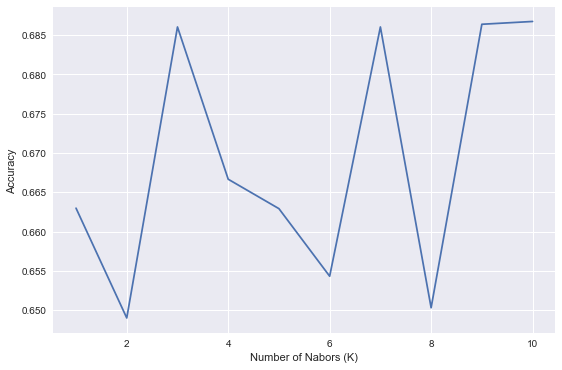

In [26]:
plt.figure(figsize=[9,6])
plt.plot(K, accuracy)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.show()

So the best fit for our model is K=10

##### Decision Trees Classifier

In [49]:
DT= DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
predict= DT.predict(xtrain)
print("In-Sample accuracy:",f1_score(ytrain, predict))
print(confusion_matrix(ytrain, predict, labels=[1,0]))

predict= DT.predict(xtest)
print("\nOut-Sample accuracy: ",f1_score(ytest, predict))
print(confusion_matrix(ytest, predict, labels=[1,0]))

In-Sample accuracy: 0.7425968109339408
[[163  89]
 [ 24 347]]

Out-Sample accuracy:  0.7250000000000001
[[ 58  32]
 [ 12 166]]


##### Support Vector Machine

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

* Linear
* Polynomial
* Radial basis function (RBF)
* Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results.

In [70]:
svc = SVC(kernel='rbf')

svc.fit(xtrain,ytrain)

predict= svc.predict(xtrain)
print("In-Sample accuracy:",f1_score(ytrain, predict))
print(confusion_matrix(ytrain, predict, labels=[1,0]))

predict= svc.predict(xtest)
print("\nOut-Sample accuracy: ",f1_score(ytest, predict))
print(confusion_matrix(ytest, predict, labels=[1,0]))

In-Sample accuracy: 0.7546391752577319
[[183  69]
 [ 50 321]]

Out-Sample accuracy:  0.7810650887573963
[[ 66  24]
 [ 13 165]]


In [71]:
svc = SVC(kernel='linear')

svc.fit(xtrain,ytrain)

predict= svc.predict(xtrain)
print("In-Sample accuracy:",f1_score(ytrain, predict))
print(confusion_matrix(ytrain, predict, labels=[1,0]))

predict= svc.predict(xtest)
print("\nOut-Sample accuracy: ",f1_score(ytest, predict))
print(confusion_matrix(ytest, predict, labels=[1,0]))

In-Sample accuracy: 0.7080745341614907
[[171  81]
 [ 60 311]]

Out-Sample accuracy:  0.7167630057803468
[[ 62  28]
 [ 21 157]]


In [72]:
svc = SVC(kernel='sigmoid')

svc.fit(xtrain,ytrain)

predict= svc.predict(xtrain)
print("In-Sample accuracy:",f1_score(ytrain, predict))
print(confusion_matrix(ytrain, predict, labels=[1,0]))

predict= svc.predict(xtest)
print("\nOut-Sample accuracy: ",f1_score(ytest, predict))
print(confusion_matrix(ytest, predict, labels=[1,0]))

In-Sample accuracy: 0.4567901234567901
[[111 141]
 [123 248]]

Out-Sample accuracy:  0.3425414364640884
[[ 31  59]
 [ 60 118]]


In [73]:
svc = SVC(kernel='poly')

svc.fit(xtrain,ytrain)

predict= svc.predict(xtrain)
print("In-Sample accuracy:",f1_score(ytrain, predict))
print(confusion_matrix(ytrain, predict, labels=[1,0]))

predict= svc.predict(xtest)
print("\nOut-Sample accuracy: ",f1_score(ytest, predict))
print(confusion_matrix(ytest, predict, labels=[1,0]))

In-Sample accuracy: 0.7473903966597077
[[179  73]
 [ 48 323]]

Out-Sample accuracy:  0.7701149425287357
[[ 67  23]
 [ 17 161]]
